# 🏠 Regression Modeling - Baseline (No Outlier Treatment, No Scaling)
This notebook builds multiple regression models on the `House_data.csv` dataset.
- with outlier treatment
- No feature scaling
- Includes EDA, model training, evaluation
- Models stored in a dictionary and compared using multiple metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load Dataset
df = pd.read_csv(r'C:\Users\USER\Documents\Python\Nareshit data analysis\stats and ML\ML\26th- mlr\MLR\House_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Basic Info and Nulls
df.info()

# Check for nulls
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# Assuming last column is target (DV) for this dataset
df.drop(columns=['id','date'],axis=1,inplace=True)

In [5]:
# IQR method to detect and remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


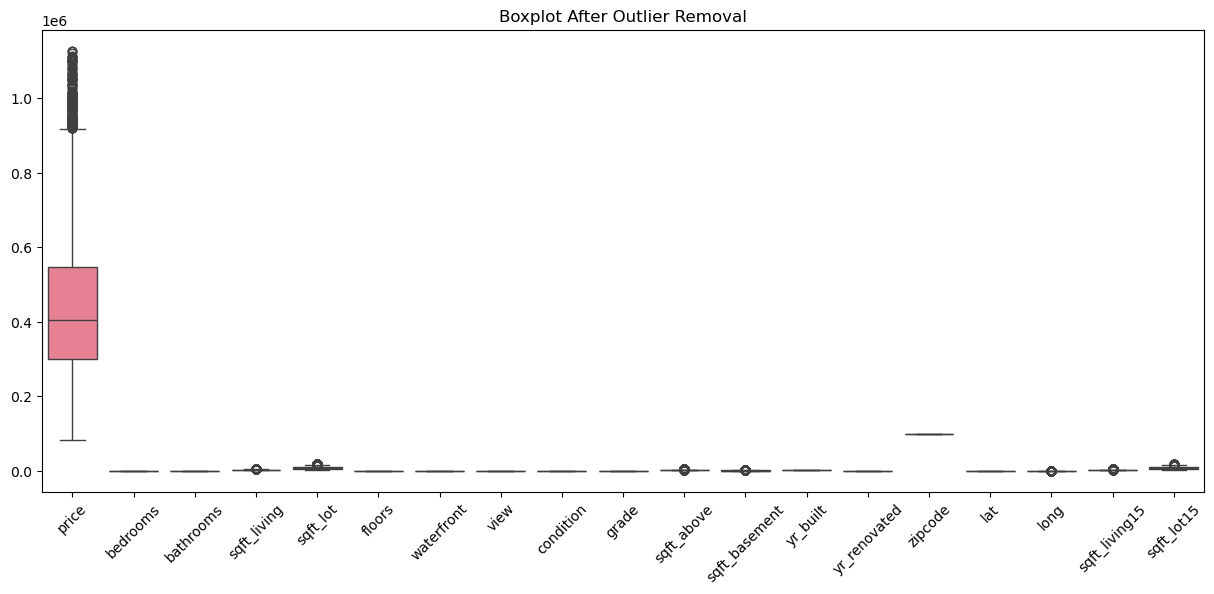

In [6]:
# Draw Boxplot (Show no outliers)
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_iqr)
plt.title("Boxplot After Outlier Removal")
plt.xticks(rotation=45)
plt.show()

In [7]:

X = df_iqr.drop("price", axis=1)  # Replace with your actual DV
y = df_iqr["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Fit Polynomial outside dictionary
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'KNN': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR(),
    'Polynomial': LinearRegression().fit(X_poly, y_train)
}

In [11]:
# Dictionary to store results
results = {}

# Loop through models
for name, model in models.items():
    if name == 'Polynomial':
        y_pred = model.predict(X_poly_test)
        bias = model.score(X_poly, y_train)
        variance = model.score(X_poly_test, y_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        bias = model.score(X_train, y_train)
        variance = model.score(X_test, y_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {
        'R2': r2,
        'RMSE': rmse,
        'MAE': mae,
        'Bias Score': bias,
        'Variance Score': variance
    }
# Display performance summary
result_df = pd.DataFrame(results).T.sort_values('R2', ascending=False)
print("\nModel Performance Summary:")
print(result_df)


Model Performance Summary:
                        R2           RMSE            MAE  Bias Score  \
RandomForest      0.862597   67076.359719   45795.050903    0.979265   
DecisionTree      0.737475   92716.313432   63997.967191    0.996831   
Polynomial        0.730312   93972.689072   70057.422836    0.740965   
LinearRegression  0.656014  106130.864971   79065.265835    0.653791   
Lasso             0.656013  106131.014293   79066.016641    0.653791   
Ridge             0.655889  106150.107693   79077.702706    0.653787   
ElasticNet        0.462836  132624.768344  103794.826716    0.475864   
KNN               0.333398  147742.182101  113419.796920    0.570792   
SVR              -0.037174  184287.909127  142007.043289   -0.033950   

                  Variance Score  
RandomForest            0.862597  
DecisionTree            0.737475  
Polynomial              0.730312  
LinearRegression        0.656014  
Lasso                   0.656013  
Ridge                   0.655889  
Elasti

In [12]:
# View Actual vs Predicted and Visualization for Top 2
top_n = 2  # You can change to 1 or 3 as needed
top_models = result_df.head(top_n).index
for name in top_models:
    print(f"\n{name} - Actual vs Predicted Comparison:\n")
    
    if name == 'Polynomial':
        y_pred = models[name].predict(X_poly_test)
    else:
        y_pred = models[name].predict(X_test)

    actual = y_test.values.ravel()
    predicted = y_pred.ravel()

    test_pred = pd.DataFrame({
        'Actual price': actual,
        'Predicted price': predicted
    })
    test_pred['Error'] = test_pred['Actual price'] - test_pred['Predicted price']
    test_pred['Absolute Error'] = test_pred['Error'].abs()

    pd.set_option('display.float_format', '{:,.2f}'.format)
    print(test_pred.head())


RandomForest - Actual vs Predicted Comparison:

   Actual price  Predicted price      Error  Absolute Error
0    172,000.00       236,216.75 -64,216.75       64,216.75
1    330,000.00       276,744.45  53,255.55       53,255.55
2    355,000.00       327,041.50  27,958.50       27,958.50
3    515,000.00       565,718.10 -50,718.10       50,718.10
4    402,000.00       412,936.43 -10,936.43       10,936.43

DecisionTree - Actual vs Predicted Comparison:

   Actual price  Predicted price      Error  Absolute Error
0    172,000.00       254,000.00 -82,000.00       82,000.00
1    330,000.00       257,000.00  73,000.00       73,000.00
2    355,000.00       328,000.00  27,000.00       27,000.00
3    515,000.00       576,250.00 -61,250.00       61,250.00
4    402,000.00       427,000.00 -25,000.00       25,000.00


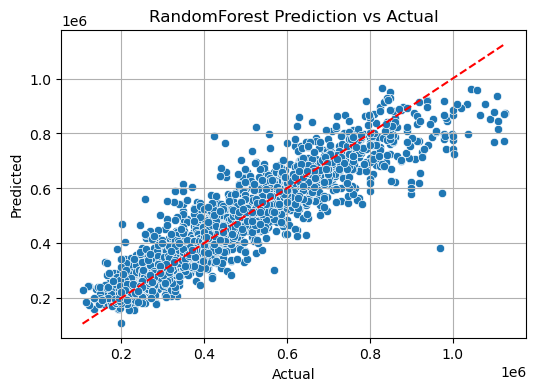

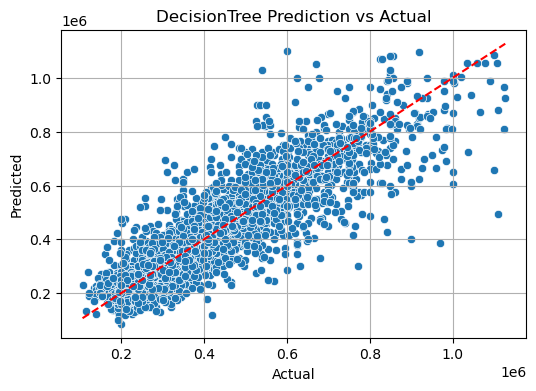

In [13]:
# Visualize predictions vs actuals for top 2 models
best_models = sorted(results.items(), key=lambda x: x[1]['R2'], reverse=True)[:2]
for name, _ in best_models:
    if name == 'Polynomial':
        y_pred = models[name].predict(X_poly_test)
    else:
        y_pred = models[name].predict(X_test)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} Prediction vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.grid(True)
    plt.show()

In [16]:

# ----------- Step 1: Initial OLS with All Features ----------- #
X_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_const).fit()
print("\nInitial OLS Summary (All Features):\n")
print(ols_model.summary())

# ----------- Step 2: Feature Elimination using p-values ----------- #
significance_level = 0.05
selected_features = list(X_train.columns)

while True:
    X_const = sm.add_constant(X_train[selected_features])
    model = sm.OLS(y_train, X_const).fit()
    p_values = model.pvalues[1:]  # exclude intercept

    if p_values.max() > significance_level:
        worst_feature = p_values.idxmax()
        print(f"Removing feature: {worst_feature} with p-value {p_values[worst_feature]:.4f}")
        selected_features.remove(worst_feature)
    else:
        break

print("\nSelected Features after p-value based elimination:")
print(selected_features)

# ----------- Step 3: Fit LinearRegression on selected features ----------- #
lr_model = LinearRegression()
lr_model.fit(X_train[selected_features], y_train)

y_pred_all = ols_model.predict(sm.add_constant(X_test[X_train.columns]))
y_pred_selected = lr_model.predict(X_test[selected_features])

# ----------- Step 4: Compare Performance ----------- #
def evaluate_model(y_test, y_pred, X_train, y_train, X_test):
    return {
        'R2': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'Bias Score': lr_model.score(X_train, y_train),
        'Variance Score': lr_model.score(X_test, y_test) 
    }

results_ols_all = evaluate_model(y_test, y_pred_all, X_train[selected_features], y_train, X_test[selected_features])
results_ols_selected = evaluate_model(y_test, y_pred_selected, X_train[selected_features], y_train, X_test[selected_features])

print("\n📊 Performance Comparison:\n")
pd.set_option('display.float_format', '{:,.4f}'.format)
comparison_df = pd.DataFrame({
    'OLS (All Features)': results_ols_all,
    'LinearReg (Selected Features)': results_ols_selected
})
print(comparison_df)


Initial OLS Summary (All Features):

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1609.
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:06:18   Log-Likelihood:            -1.5519e+05
No. Observations:               11947   AIC:                         3.104e+05
Df Residuals:                   11932   BIC:                         3.105e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

In [17]:
# Add both OLS versions to main results dictionary
results["OLS_All_Features"] = results_ols_all
results["OLS_Selected_Features"] = results_ols_selected

# Now update the result DataFrame
result_df = pd.DataFrame(results).T.sort_values('R2', ascending=False)

# Display updated results with OLS included
display(result_df)

,R2,RMSE,MAE,Bias Score,Variance Score
RandomForest,0.8626,"67,076.3597","45,795.0509",0.9793,0.8626
DecisionTree,0.7375,"92,716.3134","63,997.9672",0.9968,0.7375
Polynomial,0.7303,"93,972.6891","70,057.4228",0.7410,0.7303
OLS_Selected_Features,0.6560,"106,130.4988","79,067.1359",0.6538,0.6560
LinearRegression,0.6560,"106,130.8650","79,065.2658",0.6538,0.6560
OLS_All_Features,0.6560,"106,130.8650","79,065.2658",0.6538,0.6560
Lasso,0.6560,"106,131.0143","79,066.0166",0.6538,0.6560
Ridge,0.6559,"106,150.1077","79,077.7027",0.6538,0.6559
ElasticNet,0.4628,"132,624.7683","103,794.8267",0.4759,0.4628
KNN,0.3334,"147,742.1821","113,419.7969",0.5708,0.3334


### 📌 Interpretability Notes and Guidelines

- **Outlier Treatment** was applied using IQR. Boxplot confirmed no significant outliers.
- **No Feature Scaling** was used. Some models like SVR and KNN may show reduced performance.
- **R² (Coefficient of Determination)** closer to 1 indicates better model.
- **RMSE/MAE** should be as low as possible.
- **Bias Score (Train R²)** indicates how well the model fits training data.
- **Variance Score (Test R²)** indicates generalization ability.

---

### 📊 When to Consider Improvements

| Metric | Threshold | Action |
|--------|-----------|--------|
| R²     | < 0.70    | Improve features, try different models |
| Bias   | > 0.95    | Model may be overfitting |
| Variance | < 0.65  | Try regularization, more data, or pruning |

---

Models like **LinearRegression, Ridge, ElasticNet** are usually stable without scaling.  
Models like **SVR, KNN** require scaling for optimal performance (check other notebooks).
